<a href="https://colab.research.google.com/github/pknemi/DeepLearning/blob/main/concrete_strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA FEATURES


Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
Age -- quantitative -- Day (1~365) -- Input Variable
Concrete compressive strength -- quantitative -- MPa -- Output Variable





In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.losses import MeanSquaredError,Huber,MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
data=pd.read_csv("Concrete_Data.csv")
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [ ]:
import seaborn as sns


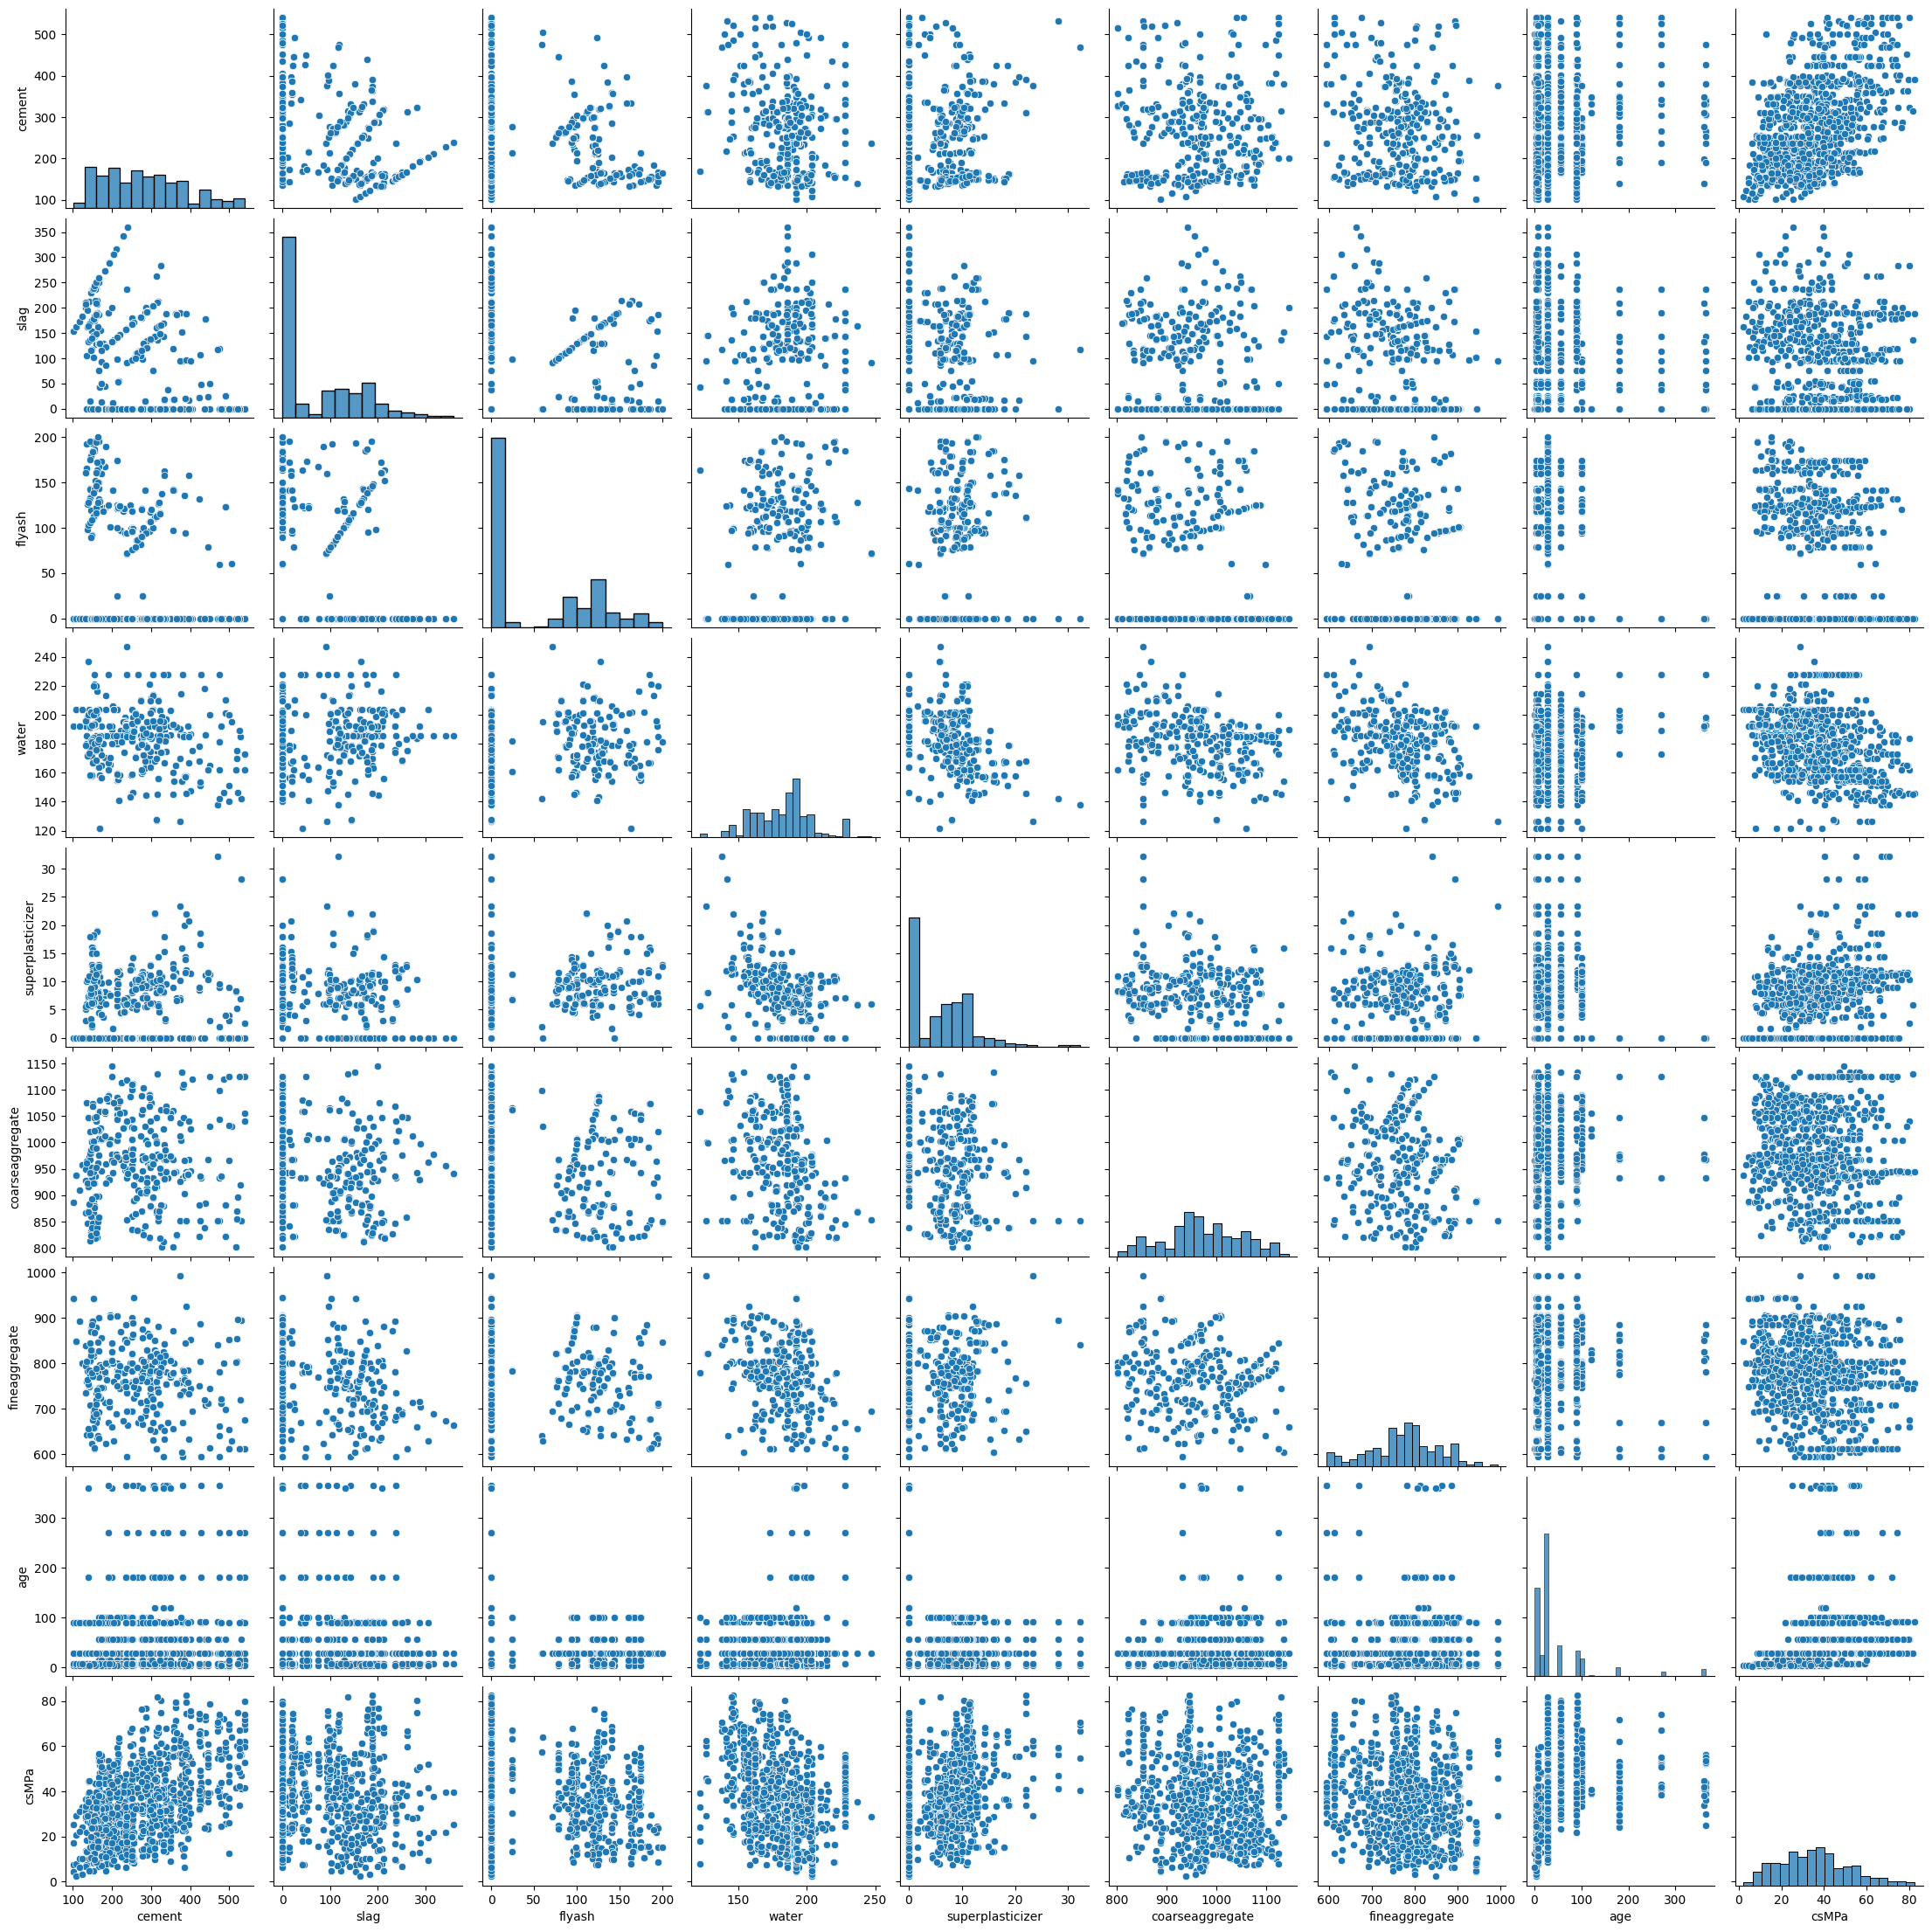

In [ ]:
sns.pairplot(data)

In [ ]:
tensor_data=tf.constant(data)#converting to tensor object
tensor_data

<tf.Tensor: shape=(1030, 9), dtype=float64, numpy=
array([[540.  ,   0.  ,   0.  , ..., 676.  ,  28.  ,  79.99],
       [540.  ,   0.  ,   0.  , ..., 676.  ,  28.  ,  61.89],
       [332.5 , 142.5 ,   0.  , ..., 594.  , 270.  ,  40.27],
       ...,
       [148.5 , 139.4 , 108.6 , ..., 780.  ,  28.  ,  23.7 ],
       [159.1 , 186.7 ,   0.  , ..., 788.9 ,  28.  ,  32.77],
       [260.9 , 100.5 ,  78.3 , ..., 761.5 ,  28.  ,  32.4 ]])>

RANDOMLY SHUFFLE THE ELEMENTS OF A TENSOR

In [ ]:
tensor_data=tf.random.shuffle(tensor_data)

In [ ]:
tensor_data[:5]

<tf.Tensor: shape=(5, 9), dtype=float64, numpy=
array([[ 297.8 ,  137.2 ,  106.9 ,  201.3 ,    6.  ,  878.4 ,  655.3 ,
          28.  ,   53.52],
       [ 528.  ,    0.  ,    0.  ,  185.  ,    6.9 ,  920.  ,  720.  ,
          28.  ,   56.83],
       [ 186.2 ,  124.1 ,    0.  ,  185.7 ,    0.  , 1083.4 ,  764.3 ,
          28.  ,   17.6 ],
       [ 136.  ,  196.  ,   98.  ,  199.  ,    6.  ,  847.  ,  783.  ,
          28.  ,   26.97],
       [ 288.  ,  192.  ,    0.  ,  192.  ,    0.  ,  932.  ,  717.8 ,
          90.  ,   50.53]])>

In [ ]:
X=tensor_data[:,:-1]
y=tensor_data[:,-1]

In [ ]:
X.shape

TensorShape([1030, 8])

In [ ]:
y.shape

TensorShape([1030])

In [ ]:
y=tf.expand_dims(y,axis=-1)

In [ ]:
y.shape

TensorShape([1030, 1])

SPLITTING THE DATASET TO TRAIN,VALIDATION,TEST DATASETS

In [ ]:
train_ratio=0.8
val_ratio=0.1
test_ratio=0.1
dataset_size=len(tensor_data)


TRAINING DATA

In [ ]:
X_train=X[:int(train_ratio*dataset_size)]
y_train=y[:int(train_ratio*dataset_size)]

In [ ]:
X_train

<tf.Tensor: shape=(824, 8), dtype=float64, numpy=
array([[ 297.8,  137.2,  106.9, ...,  878.4,  655.3,   28. ],
       [ 528. ,    0. ,    0. , ...,  920. ,  720. ,   28. ],
       [ 186.2,  124.1,    0. , ..., 1083.4,  764.3,   28. ],
       ...,
       [ 157. ,  236. ,    0. , ...,  935.4,  781.2,   28. ],
       [ 339. ,    0. ,    0. , ...,  968. ,  781. ,   28. ],
       [ 218.2,   54.6,  123.8, ..., 1075.7,  792.7,   14. ]])>

In [ ]:
y_train.shape

TensorShape([824, 1])

creating a tensorflow dataset

In [ ]:
train_dataset=tf.data.Dataset.from_tensor_slices((X_train,y_train))
train_dataset=train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

validation dataset

In [ ]:
X_val=X[int(train_ratio*dataset_size):int((train_ratio+val_ratio)*dataset_size)]
y_val=y[int(train_ratio*dataset_size):int((train_ratio+val_ratio)*dataset_size)]

In [ ]:
X_val.shape

TensorShape([103, 8])

In [ ]:
y_val.shape

TensorShape([103, 1])

In [ ]:
val_dataset=tf.data.Dataset.from_tensor_slices((X_val,y_val))
val_dataset=val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
X_test=X[int((train_ratio+val_ratio)*dataset_size):]
y_test=y[int((train_ratio+val_ratio)*dataset_size):]

In [ ]:
 X_test.shape

TensorShape([103, 8])

In [ ]:
y_test.shape

TensorShape([103, 1])

In [ ]:
test_dataset=tf.data.Dataset.from_tensor_slices((X_test,y_test))
test_dataset=test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

scaling/normalizing

In [ ]:
normalizer=Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.17150067,  0.73114437,  0.83079267,  0.8986982 , -0.02467084,
        -1.240668  , -1.4456656 , -0.28588393],
       [ 2.346956  , -0.8753423 , -0.8454877 ,  0.14925545,  0.12716234,
        -0.70164734, -0.64559245, -0.28588393],
       [-0.8831509 ,  0.57775533, -0.8454877 ,  0.18143997, -1.0368919 ,
         1.4155655 , -0.09778366, -0.28588393],
       [-1.357555  ,  1.4196388 ,  0.6912333 ,  0.79294854, -0.02467084,
        -1.6475257 ,  0.13345863, -0.28588393],
       [ 0.07888801,  1.3728024 , -0.8454877 ,  0.471102  , -1.0368919 ,
        -0.5461605 , -0.67279756,  0.6767604 ]], dtype=float32)>

In [ ]:
model=tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(16,activation='relu'),
    Dense(1)
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,482 (40.95 KB)

 Trainable params: 10,465 (40.88 KB)

 Non-trainable params: 17 (72.00 B)

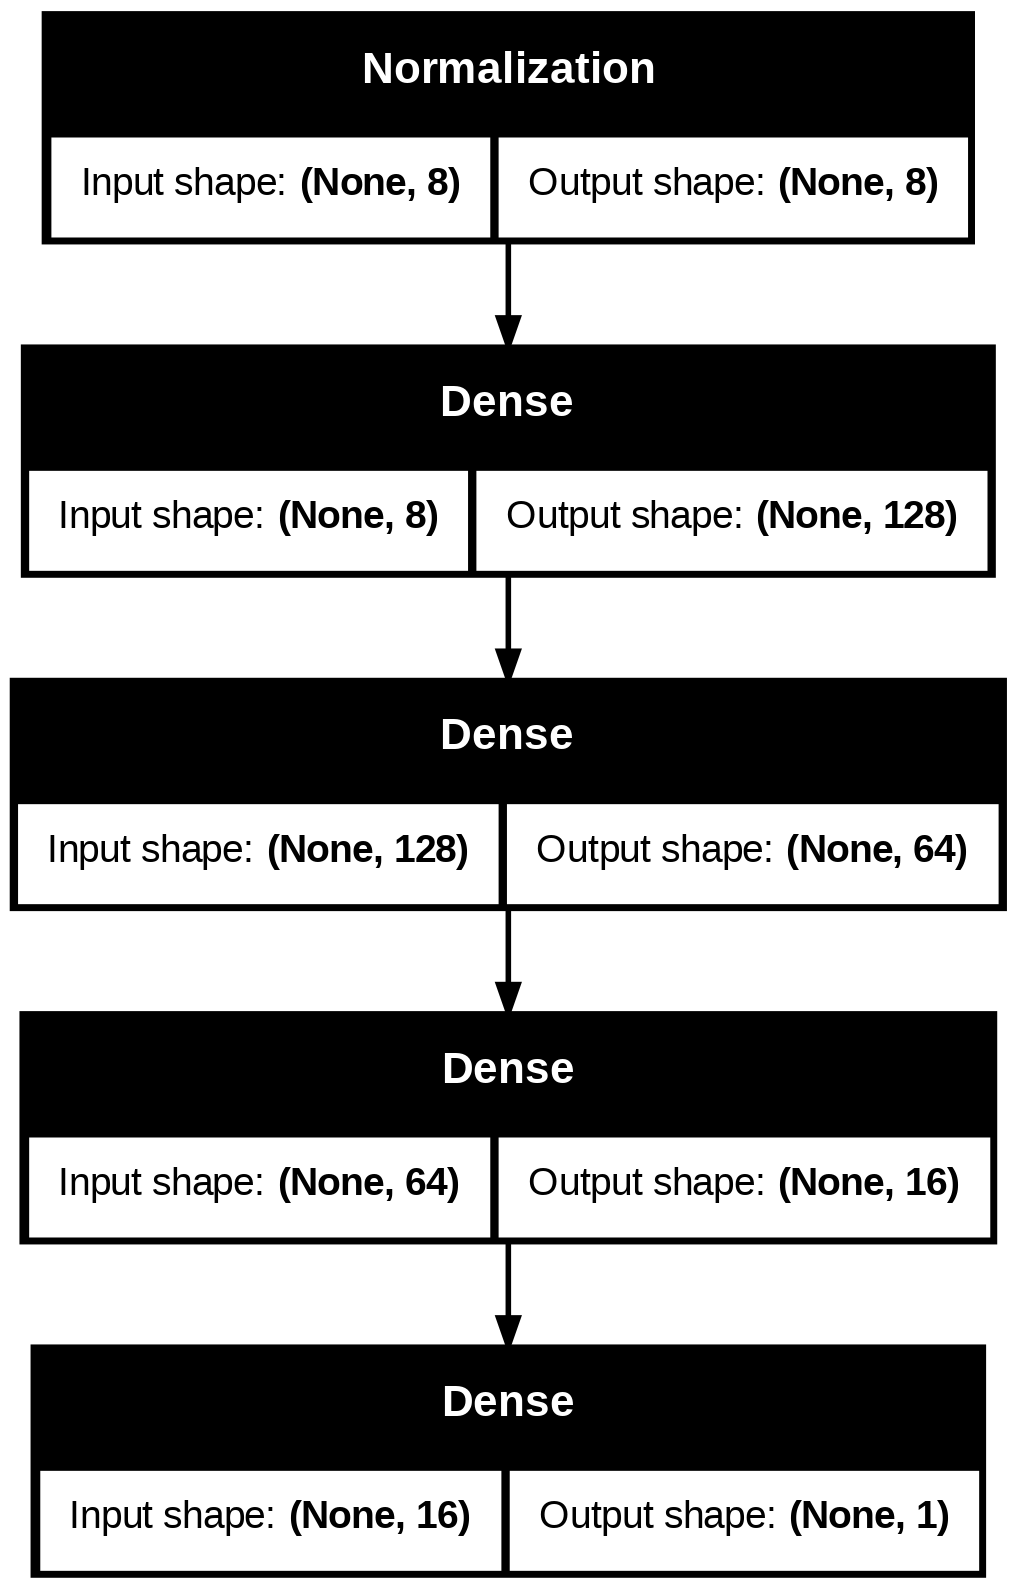

In [ ]:
tf.keras.utils.plot_model(model,to_file='model.png',show_shapes=True)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.1),loss=MeanAbsoluteError(),metrics=[RootMeanSquaredError()])

In [ ]:
model

<Sequential name=sequential, built=True>

In [ ]:
summary=model.fit(train_dataset,epochs=100,validation_data=val_dataset,verbose=1)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 35.8045 - root_mean_squared_error: 46.7190 - val_loss: 19.7860 - val_root_mean_squared_error: 30.6869
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.0386 - root_mean_squared_error: 21.5210 - val_loss: 11.4102 - val_root_mean_squared_error: 13.8143
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.9579 - root_mean_squared_error: 13.7371 - val_loss: 9.3375 - val_root_mean_squared_error: 11.8543
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1371 - root_mean_squared_error: 11.5575 - val_loss: 8.0865 - val_root_mean_squared_error: 9.7261
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3619 - root_mean_squared_error: 9.4013 - val_loss: 8.2048 - val_root_mean_squared_error: 10.8018
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3333 - root_mean_squared_error: 9.3465 - val_loss: 5.7458 - val_root_mean_squared_error: 7.3544
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

In [ ]:
import matplotlib.pyplot as plt

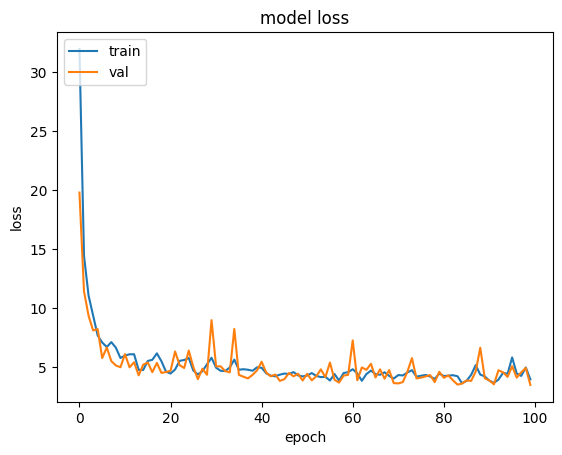

In [ ]:
plt.plot(summary.history['loss'])
plt.plot(summary.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

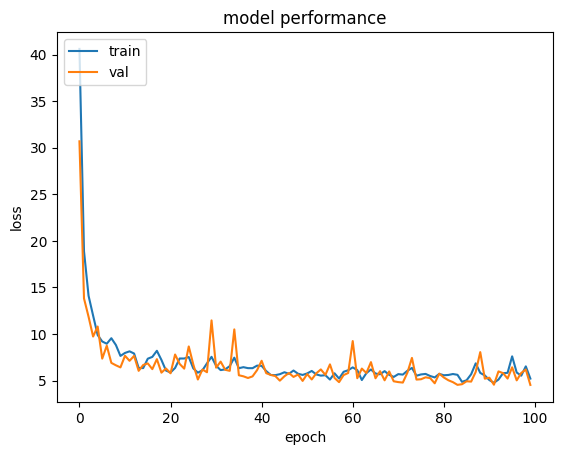

In [ ]:
plt.plot(summary.history['root_mean_squared_error'])
plt.plot(summary.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()